In [41]:
import numpy as np
import pandas as pd
from DataProcessing import Data

In [42]:
d = Data()
d.get_index_names()

S&P 500: ['AAPL', 'ORCL', 'GOOGL', 'AMZN', 'BK', 'LIFE', 'T', 'XOM']
 VN: ['VHM', 'CTR', 'FPT', 'MBB']


['AAPL',
 'ORCL',
 'GOOGL',
 'AMZN',
 'BK',
 'LIFE',
 'T',
 'XOM',
 'VHM',
 'CTR',
 'FPT',
 'MBB']

In [134]:
chosen_index = 'AAPL'

In [135]:
d.preprocess(chosen_index)

Processing AAPL.csv
Saved AAPL data at data/processed/AAPL.csv


In [136]:
df = d.get_data(chosen_index)

In [106]:
df.head

<bound method NDFrame.head of            Date    Close   Volume        RSI        MFI           EMA  \
0    2019-04-01  92400.0   334480  85.102948  46.916858  91671.458559   
1    2019-04-02  92200.0   359690  60.686970  38.602377  91741.930752   
2    2019-04-03  92000.0   281350  55.712418  34.159414  91776.339985   
3    2019-04-04  92000.0   489550  51.750921  45.601086  91806.161320   
4    2019-04-05  92600.0   454260  48.898215  42.104667  91912.006477   
..          ...      ...      ...        ...        ...           ...   
723  2022-02-23  79400.0  2850000  46.858287  37.328201  79900.499755   
724  2022-02-24  78600.0  5284300  45.414589  36.375513  79727.099787   
725  2022-02-25  78300.0  2693300  46.900771  34.511452  79536.819816   
726  2022-02-28  77500.0  2837300  46.144075  25.960529  79265.243840   
727  2022-03-01  78000.0  2459200  45.032803  31.291963  79096.544662   

            SO          MACD  Next Day Price  
0    57.647059  92340.391242         92200.0  

In [107]:
df.columns

Index(['Date', 'Close', 'Volume', 'RSI', 'MFI', 'EMA', 'SO', 'MACD',
       'Next Day Price'],
      dtype='object')

In [137]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [138]:
X = df[df.columns[1:8]].values
y = df[df.columns[8]].values

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=37)

In [139]:
TRAIN_PERCENT = 0.7
train_size = int(TRAIN_PERCENT*len(X))

X_train = X[0:train_size]
y_train = y[0:train_size]
X_test = X[train_size:len(X)]
y_test = y[train_size:len(y)]

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [170]:
model = SVR(kernel='rbf', C = 190)
model.fit(X_train_scaled, y_train)

SVR(C=500)

In [172]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 112.89003052203381
Mean Absolute Error: 7.527864277184771
R-squared: 0.7080401070994038


In [173]:
import matplotlib.pyplot as plt

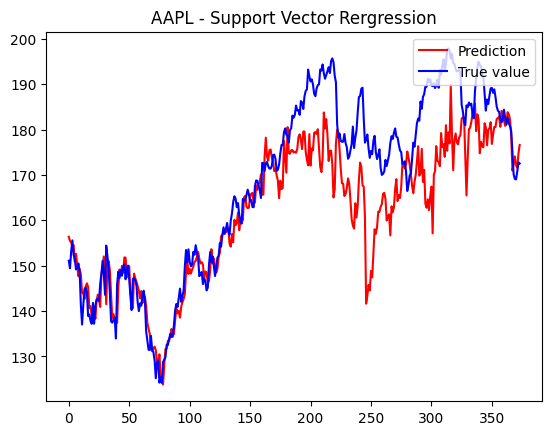

In [174]:
plt.plot(y_pred,color='red',label='Prediction')
plt.plot(y_test,color='blue',label='True value')
plt.legend(loc='upper right')
plt.title(f'{chosen_index} - Support Vector Rergression')
plt.show()